## 0. Preliminaries

In [4]:
import nltk, re, pprint
from nltk import word_tokenize

# Classification

### Decision Trees

In [2]:
from nltk.corpus import brown

In [3]:
suffix_fdist = nltk.FreqDist()

In [4]:
for word in brown.words():
    word = word.lower()
    suffix_fdist[word[-1:]] += 1
    suffix_fdist[word[-2:]] += 1
    suffix_fdist[word[-3:]] += 1

In [5]:
common_suffixes = [suffix for (suffix, count) in suffix_fdist.most_common(100)]

In [6]:
print(common_suffixes)

['e', ',', '.', 's', 'd', 't', 'he', 'n', 'a', 'of', 'the', 'y', 'r', 'to', 'in', 'f', 'o', 'ed', 'nd', 'is', 'on', 'l', 'g', 'and', 'ng', 'er', 'as', 'ing', 'h', 'at', 'es', 'or', 're', 'it', '``', 'an', "''", 'm', ';', 'i', 'ly', 'ion', 'en', 'al', '?', 'nt', 'be', 'hat', 'st', 'his', 'th', 'll', 'le', 'ce', 'by', 'ts', 'me', 've', "'", 'se', 'ut', 'was', 'for', 'ent', 'ch', 'k', 'w', 'ld', '`', 'rs', 'ted', 'ere', 'her', 'ne', 'ns', 'ith', 'ad', 'ry', ')', '(', 'te', '--', 'ay', 'ty', 'ot', 'p', 'nce', "'s", 'ter', 'om', 'ss', ':', 'we', 'are', 'c', 'ers', 'uld', 'had', 'so', 'ey']


In [7]:
def pos_features(word):
    features = {}
    for suffix in common_suffixes:
        features['endswith({})'.format(suffix)] = word.lower().endswith(suffix)
    return features

In [8]:
tagged_words = brown.tagged_words(categories='news')

In [9]:
featuresets = [(pos_features(n), g) for (n,g) in tagged_words]

In [10]:
size = int(len(featuresets) * 0.1)

In [11]:
train_set, test_set = featuresets[size:], featuresets[:size]

In [104]:
classifier = nltk.DecisionTreeClassifier.train(train_set)

In [105]:
nltk.classify.accuracy(classifier, test_set)

0.6270512182993535

In [106]:
classifier.classify(pos_features('crickets'))

'NNS'

In [108]:
print(classifier.pseudocode(depth=4))

if endswith(the) == False: 
  if endswith(,) == False: 
    if endswith(s) == False: 
      if endswith(.) == False: return '.'
      if endswith(.) == True: return '.'
    if endswith(s) == True: 
      if endswith(is) == False: return 'PP$'
      if endswith(is) == True: return 'BEZ'
  if endswith(,) == True: return ','
if endswith(the) == True: return 'AT'



### Bayesian Classifiers

In [12]:
classifier_bayesian = nltk.NaiveBayesClassifier.train(train_set)

In [13]:
classifier_bayesian.classify(pos_features('crickets'))

'NNS'

In [17]:
classifier_bayesian.classify(pos_features('jumped'))

'VBN'

In [18]:
classifier_bayesian.show_most_informative_features(15)

Most Informative Features
             endswith(.) = True                . : NN     =   6986.9 : 1.0
            endswith(es) = True              DOZ : IN     =   6236.0 : 1.0
            endswith(we) = True           PPSS-H : NN     =   5866.5 : 1.0
            endswith(he) = True            AT-TL : NN     =   4262.2 : 1.0
           endswith(are) = True              BER : NP     =   4244.5 : 1.0
             endswith(a) = True            NN-NC : IN     =   3343.5 : 1.0
            endswith(th) = True              ABX : NNS    =   2969.0 : 1.0
             endswith(h) = True              ABX : NNS    =   2969.0 : 1.0
             endswith(r) = True              DTX : NNS    =   2825.1 : 1.0
           endswith(hat) = True               CS : NN     =   2727.0 : 1.0
            endswith(of) = True            IN-TL : NN     =   2660.7 : 1.0
           endswith(uld) = True            MD-HL : NP     =   2657.1 : 1.0
            endswith(to) = True               TO : JJ     =   2618.1 : 1.0

In [14]:
print(nltk.classify.accuracy(classifier_bayesian, test_set))

KeyboardInterrupt: 

## Reminder: There's probably a function for that.

In [17]:
def text_from_web(url):
    from urllib import request
    html = request.urlopen(url).read().decode('utf8')
    from bs4 import BeautifulSoup
    raw = BeautifulSoup(html, "html.parser")
    raw = raw.get_text()
    return raw

In [18]:
url = "http://digitalhumanities.org/dhq/vol/4/1/000080/000080.html"

In [19]:
raw = text_from_web(url)

In [20]:
tokens = nltk.wordpunct_tokenize(raw)
text = nltk.Text(tokens)
words = [w.lower() for w in tokens]
vocab = sorted(set(words))

In [21]:
vocab

['!',
 '"',
 '")',
 '").',
 '");',
 '"+\'',
 '",',
 '",(',
 '".',
 '":',
 '"[',
 '#',
 '%',
 '&',
 "'",
 "')",
 "');",
 "')[",
 "',",
 "'.",
 "';",
 "';&",
 "']);",
 '(',
 '("',
 "('",
 '()',
 '()));',
 '());',
 '()+',
 '(),",',
 '();',
 '([',
 "(['",
 ')',
 '),',
 ').',
 ').[',
 '):',
 ');',
 ')[',
 ')],"',
 ')”.',
 '*',
 '*/',
 '+',
 "+'",
 ',',
 ',"',
 ',%',
 ",'",
 ',[',
 '-',
 '--&',
 '-->',
 '-.',
 '-]',
 '.',
 '."',
 '.%',
 '.)',
 '.).',
 '.,',
 '.-',
 '...',
 '.[',
 '/',
 '/),',
 '/).',
 '/*',
 '/.',
 '/.[',
 '//',
 '/?',
 '/~',
 '0',
 '000',
 '000040',
 '000080',
 '000952',
 '001004',
 '002557',
 '01',
 '0346',
 '04',
 '05',
 '07',
 '08',
 '09',
 '1',
 '10',
 '100ce',
 '101in',
 '102',
 '102in',
 '103different',
 '104the',
 '105',
 '105computers',
 '106interestingly',
 '107increasingly',
 '108here',
 '109there',
 '10necessarily',
 '11',
 '110',
 '110the',
 '111another',
 '112pliny',
 '113',
 '113a',
 '114this',
 '115there',
 '116',
 '116further',
 '117digital',
 '118informatio

In [83]:
tagged_text = nltk.pos_tag(text)

In [84]:
tagged_text

[('Abstract', 'VB'),
 ('The', 'DT'),
 ('digital', 'JJ'),
 ('humanities', 'NNS'),
 ('is', 'VBZ'),
 ('increasingly', 'RB'),
 ('becoming', 'VBG'),
 ('a', 'DT'),
 ('"', 'JJ'),
 ('buzzword', 'NN'),
 ('",', 'NN'),
 ('and', 'CC'),
 ('there', 'EX'),
 ('is', 'VBZ'),
 ('more', 'JJR'),
 ('and', 'CC'),
 ('more', 'RBR'),
 ('talk', 'NN'),
 ('about', 'IN'),
 ('a', 'DT'),
 ('broadly', 'RB'),
 ('conceived', 'VBN'),
 (',', ','),
 ('inclusive', 'JJ'),
 ('digital', 'JJ'),
 ('humanities', 'NNS'),
 ('.', '.'),
 ('The', 'DT'),
 ('field', 'NN'),
 ('is', 'VBZ'),
 ('expanding', 'VBG'),
 ('and', 'CC'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('same', 'JJ'),
 ('time', 'NN'),
 ('being', 'VBG'),
 ('negotiated', 'VBN'),
 (',', ','),
 ('and', 'CC'),
 ('this', 'DT'),
 ('article', 'NN'),
 ('explores', 'VBZ'),
 ('the', 'DT'),
 ('idea', 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('broadly', 'RB'),
 ('conceived', 'JJ'),
 ('landscape', 'NN'),
 ('of', 'IN'),
 ('digital', 'JJ'),
 ('humanities', 'NNS'),
 ('in', 'IN'),
 ('some', 'DT'),
 ('d

In [66]:
type(tagged_text)

list

In [85]:
tag_fd = nltk.FreqDist(tag for (word, tag) in tagged_text)

In [86]:
tag_fd.most_common()

[('NN', 4405),
 ('IN', 3277),
 ('JJ', 2963),
 ('DT', 2587),
 ('NNP', 2385),
 ('NNS', 2065),
 (',', 1450),
 ('CC', 1326),
 ('.', 1183),
 ('RB', 1174),
 ('CD', 986),
 ('VB', 735),
 ('VBZ', 731),
 ('VBN', 624),
 ('VBP', 528),
 ('VBG', 516),
 ('TO', 499),
 (':', 468),
 ('PRP', 439),
 ('VBD', 297),
 ('MD', 290),
 ('(', 229),
 ('WDT', 128),
 ('PRP$', 114),
 ('EX', 107),
 ('RBR', 89),
 ('WRB', 79),
 (')', 75),
 ('JJR', 63),
 ('NNPS', 58),
 ('WP', 54),
 ('$', 34),
 ('JJS', 32),
 ('RP', 29),
 ('#', 26),
 ("''", 22),
 ('POS', 21),
 ('FW', 14),
 ('SYM', 12),
 ('RBS', 7),
 ('PDT', 7),
 ('WP$', 4)]

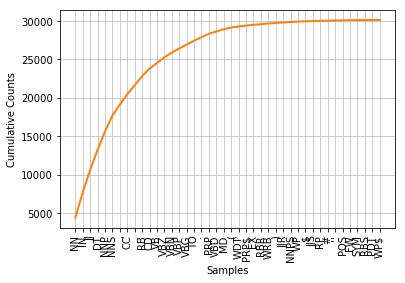

In [88]:
tag_fd.plot(cumulative=True)